# Homework 21.3
# Caelan Osman
# March 29, 2022

In [1]:
import numpy as np
from scipy.integrate import solve_bvp
from matplotlib import pyplot as plt

## Exercise 21.8

Remember for this problem we have that

\begin{align}
N'(t) = rN(t) \log\left(\frac{1}{N(t)}\right) - \delta u(t) N(t), \, N(0) = N_0
\end{align}

while we are trying to minimize the functional

\begin{align}
    J[u] &= \int_0^{t_f} N^2(t) + u^2(t) \, dt
\end{align}

which gives the Hamiltonian

\begin{align}
    H(t) = rp(t) N(t) \log\left(\frac{1}{N(t)}\right) - \delta p(t) u(t) N(t) - N^2(t) - u^2(t)
\end{align}

then we get the costate equation

\begin{align}
    p'(t) = -r p(t) \log \left(\frac{1}{N(t)}\right) + rp(t) + \delta p(t) u(t) + 2N(t), \, p(t_f) = 0
\end{align}

where the costate final condition comes from the fact that we have no final cost so that $\frac{D\phi}{D N(t_f)} =0$.
Then from the Maximum principle we have that

\begin{align}
H_u &= 0 = -2u(t) - \delta N(t) p(t)\\
    &\implies u(t) = \frac{-\delta}{2}p(t) N(t)
\end{align}



This allows us to rewrite the costate and state differential equations as
\begin{align}
N'(t) &= rN(t)\log\left(\frac{1}{N(t)}\right) - \delta \left(\frac{-\delta}{2} p(t) N(t)\right)N(t) = rN(t)\log\left(\frac{1}{N(t)}\right) + \frac{\delta^2}{2} p(t) N^2(t)\\
p'(t) &= -rp(t) \log\left(\frac{1}{N(t)}\right) + rp(t) + \delta p(t)\left(\frac{-\delta}{2} p(t) N(t)\right) + 2N(t) = -rp(t) \log\left(\frac{1}{N(t)}\right) + rp(t) -\frac{\delta^2}{2} p^2(t) N(t) + 2N(t)  
\end{align}

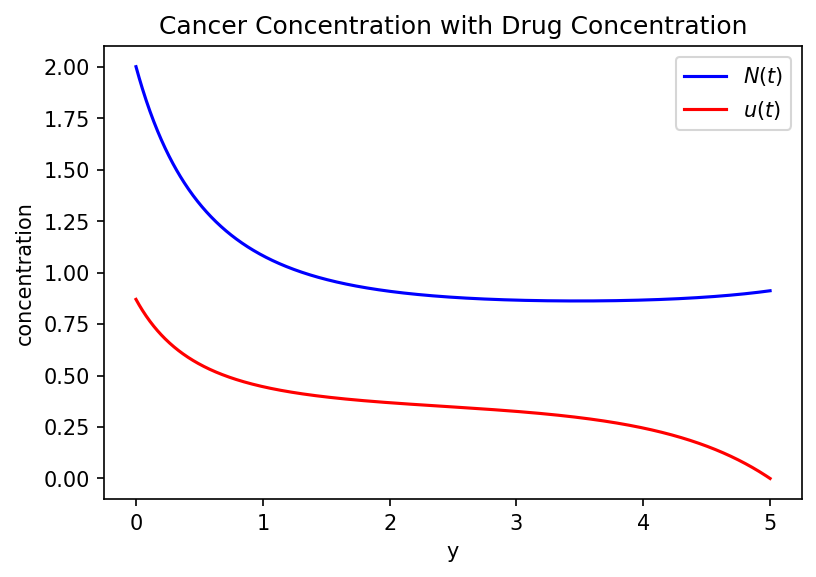

In [2]:
def problem21_8():

    r, N0, delta, tf = (1, 2, 0.5, 5)

    # we let y[0] = N, y[1] = p
    def ode(t, y):

        N = y[0]
        p = y[1]
        Nprime = r*N*np.log(1/N) + (delta**2 *p*N**2)/2
        pprime = -r*p*np.log(1/N) + r*p - (delta**2 *p**2 *N)/2 + 2*N

        return np.array([Nprime, pprime])

    def bc(ya, yb):

        return np.array([ya[0] - N0, yb[1] - 0])

    # initialize variables
    t_steps = 1000
    t = np.linspace(0, tf, t_steps)
    y0 = np.ones((2, t_steps))

    # solve and get u
    sol = solve_bvp(ode, bc, t, y0)
    N = sol.y[0]
    p = sol.y[1]
    u = -delta*p*N/2

    # plot solution
    fig = plt.figure()
    fig.set_dpi(150)
    ax = fig.add_subplot(111)
    ax.plot(t, N, "b-", label=r"$N(t)$")
    ax.plot(t, u, "r-", label=r"$u(t)$")
    ax.legend(loc="best")
    ax.set_xlabel("y")
    ax.set_ylabel("concentration")
    ax.set_title("Cancer Concentration with Drug Concentration")
    plt.show()

    return

problem21_8()

This makes sense in the aspect that the solution is correct. However, the concentration of the caner cells didn't go to zero. Without adding an endpoing cost, we cannot be sure that the concentration will ever go to zero.

## Exercise 21.9

Again we have the state equation

\begin{align}
    N'(t) = rN(t) \log\left(\frac{1}{N(t)}\right) - \delta u(t) N(t), \, N(0) = N0
\end{align}

Where now we have the cost functional

\begin{align}
    \min_{u} J[u, t_f] &= \min_{u}\left\{ mN(t_f) + \int_0^{t_f} u^2 \, dt\right\}
\end{align}

Where we are trying to minimize the concentration of the chemicla drug and minimize the endpoint cost. 
Note here, that we still have a fixed time. 
Now we have the hamiltonian

\begin{align}
H(t) &= rp(t)N(t)\log\left(\frac{1}{N(t)}\right) - \delta p(t) u(t) N(t) - u^2(t)
\end{align}

Now the costate equation is given by

\begin{align}
p'(t) &= -rp(t) \log\left(\frac{1}{N(t)}\right) + rp(t) + \delta p(t) u(t), \quad p(t_f) = -m  
\end{align}

where the final condition is gotten from the endpoint cost. 
Then the maximum priniciple tells us that

\begin{align}
0 &= H_0 = -2u(t) - \delta N(t)p(t)\\
&\implies u(t) = \frac{-\delta}{2}N(t)p(t)
\end{align}

Using this we can update our state and costate equations as

\begin{align}
    N'(t) &= rN(t) \log\left(\frac{1}{N(t)}\right) + \frac{\delta^2}{2}p(t)N^2(t), \quad N(0) = N_0\\
    p'(t) &= -rp(t) \log\left(\frac{1}{N(t)}\right) + rp(t) - \frac{\delta^2}{2} p^2(t) N(t), \quad p(t_f) = -m
\end{align}

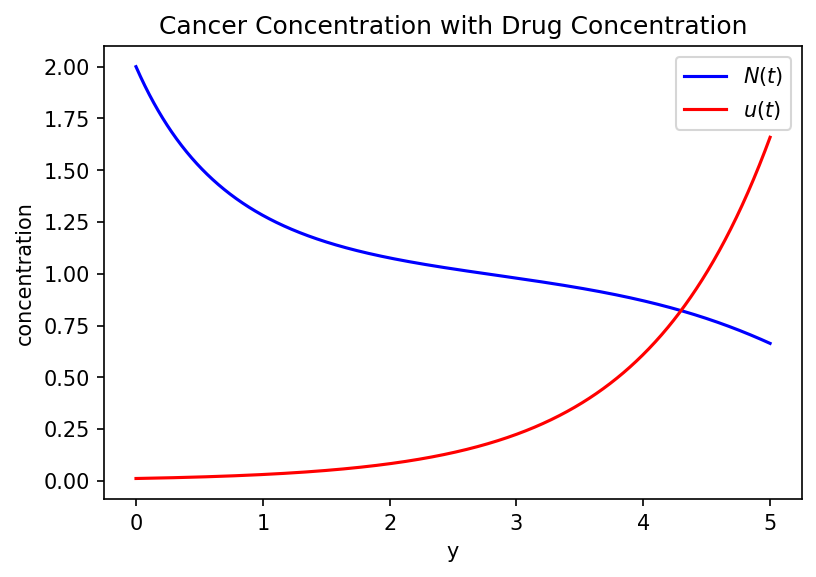

In [3]:
def problem21_9():

    m, r, N0, delta, tf = (10, 1, 2, 0.5, 5)

    def ode(t, y):

        N = y[0]
        p = y[1]

        Nprime = r*N*np.log(1/N) + ((delta**2) * p * (N**2)) / 2
        pprime = -r*p*np.log(1/N) + r*p - ((delta**2) * N * (p**2)) / 2

        return np.array([Nprime, pprime])

    def bc(ya, yb):

        return np.array([ya[0] - N0, yb[1] + m])

    t_steps = 1000
    t = np.linspace(0, tf, t_steps)
    y0 = np.ones((2, t_steps))

    # solve and get u
    sol = solve_bvp(ode, bc, t, y0)
    N = sol.y[0]
    p = sol.y[1]
    u = -delta*p*N/2

    # plot solution
    fig = plt.figure()
    fig.set_dpi(150)
    ax = fig.add_subplot(111)
    ax.plot(t, N, "b-", label=r"$N(t)$")
    ax.plot(t, u, "r-", label=r"$u(t)$")
    ax.legend(loc="best")
    ax.set_xlabel("y")
    ax.set_ylabel("concentration")
    ax.set_title("Cancer Concentration with Drug Concentration")
    plt.show()
    
    return

problem21_9()

## Exercise 21.10

Again we have the state equation

\begin{align}
    N'(t) = rN(t) \log\left(\frac{1}{N(t)}\right) - \delta u(t) N(t), \, N(0) = N_0
\end{align}

Where now we have the cost functional

\begin{align}
    \min_{u,\, t_f} J[u, t_f] &= \min_{u, \, t_f }\left\{ mN(t_f) + \int_0^{t_f} u^2 \, dt\right\}
\end{align}

Where we are trying to minimize the concentration of the chemicla drug and minimize the endpoint cost. 
Here we are also optimizing over the final time. 

\begin{align}
H(t) &= rp(t)N(t)\log\left(\frac{1}{N(t)}\right) - \delta p(t) u(t) N(t) - u^2(t)
\end{align}

Now the costate equation is given by

\begin{align}
p'(t) &= -rp(t) \log\left(\frac{1}{N(t)}\right) + rp(t) + \delta p(t) u(t), \quad p(t_f) = -m  
\end{align}

where the final condition is gotten from the endpoint cost. 
Then the maximum priniciple tells us that

\begin{align}
0 &= H_0 = -2u(t) - \delta N(t)p(t)\\
&\implies u(t) = \frac{-\delta}{2}N(t)p(t)
\end{align}

Using this we can update our state and costate equations as

\begin{align}
    N'(t) &= rN(t) \log\left(\frac{1}{N(t)}\right) + \frac{\delta^2}{2}p(t)N^2(t), \quad N(0) = N_0\\
    p'(t) &= -rp(t) \log\left(\frac{1}{N(t)}\right) + rp(t) - \frac{\delta^2}{2} p^2(t) N(t), \quad p(t_f) = -m
\end{align}
but since we are optimizing over the final time as well we have the additional condition that

\begin{align}
    H(t_f) &= \frac{\partial \phi}{\partial t_f}(t_f)\\
    & \implies  rp(t_f)N(t_f)\log\left(\frac{1}{N(t_f)}\right) - \delta p(t_f) u(t_f) N(t_f) - u^2(t_f) = 0\\
    & \implies  rp(t_f)N(t_f)\log\left(\frac{1}{N(t_f)}\right) - \delta p(t_f) \left(\frac{-\delta}{2} N(t_f)p(t_f)\right) N(t_f) - \left(\frac{-\delta}{2} N(t_f)p(t_f)\right)^2 = 0\\
    & \implies  rp(t_f)N(t_f)\log\left(\frac{1}{N(t_f)}\right) + \frac{\delta^2}{2} N^2(t_f)p^2(t_f) - \frac{\delta^2}{4} N^2(t_f) p^2(t_f) = 0\\
    & \implies  rp(t_f)N(t_f)\log\left(\frac{1}{N(t_f)}\right) + \frac{\delta^2}{4} N^2(t_f)p^2(t_f) = 0 
\end{align}

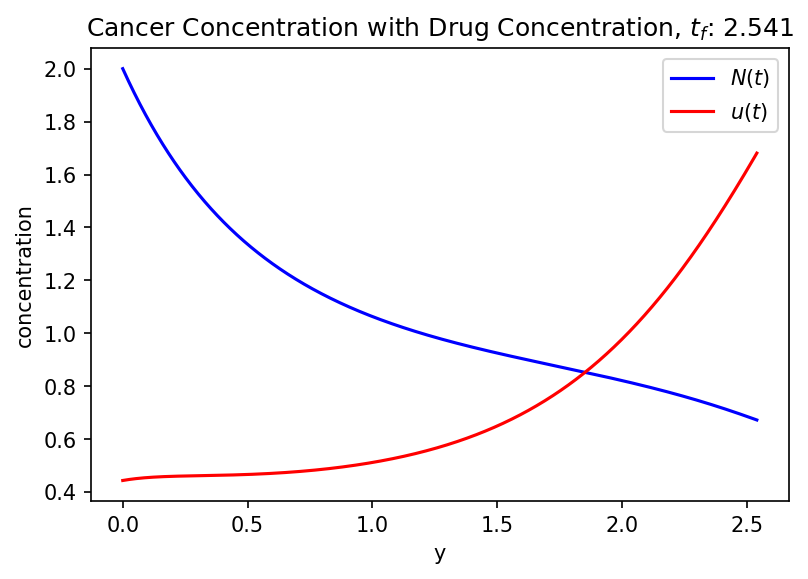

In [4]:
def problem21_10():

    m, r, N0, delta = (10, 1, 2, 0.5)

    def ode(t, y, p):

        u = -delta*y[0]*y[1]/2
        Nprime = r*y[0]*np.log(1/y[0]) - delta*u*y[0]
        pprime = -r*y[1]*np.log(1/y[0]) + r*y[1] + delta*y[1]*u


        return p[0]*np.array([Nprime, pprime])

    def bc(ya, yb, p):
        
        u = delta*yb[0]*m /2

        H = r*(-m)*yb[0]*np.log(1/yb[0]) + delta*u*yb[0]*m - u**2

        return np.array([ya[0] - N0, yb[1] + m, H])

    t_steps = 1000
    t = np.linspace(0, 1, t_steps)
    y0 = np.ones((2, t_steps))
    p0 = np.array([6])

    # solve and get u
    sol = solve_bvp(ode, bc, t, y0, p0)
    N = sol.y[0]
    p = sol.y[1]
    u = -delta*p*N/2

    tf = sol.p[0]

    # plot solution
    fig = plt.figure()
    fig.set_dpi(150)
    ax = fig.add_subplot(111)
    ax.plot(tf*t, N, "b-", label=r"$N(t)$")
    ax.plot(tf*t, u, "r-", label=r"$u(t)$")
    ax.legend(loc="best")
    ax.set_xlabel("y")
    ax.set_ylabel("concentration")
    ax.set_title("Cancer Concentration with Drug Concentration, $t_f$: " + str(round(tf, 3)))
    plt.show()
    
    return

problem21_10()